In [3]:
from spectral import *
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [27]:
from pathlib import Path
import os

# --- Configuration ---
# Use raw string (r"...") or forward slashes to avoid Windows path errors
ROOT_DIR = "D:/Leaf_Project/"
FILENAME = "Data Progress.txt"

print(f"Root Directory set to: {ROOT_DIR}")
print(f"Input File set to: {FILENAME}")

Root Directory set to: D:/Leaf_Project/
Input File set to: Data Progress.txt


In [30]:
# Store valid paths in a list so we can use them later (e.g., for copying)
valid_paths = []
current_date_folder = None

# Open and read the file
try:
    with open(FILENAME, 'r') as file:
        # Read all lines and strip whitespace at the start/end of the line
        lines = [line.strip() for line in file if line.strip()]

    print(f"Processing {len(lines)} lines from file...\n")

    for line in lines:
        # --- 1. Header Detection ---
        if line.endswith(':'):
            header = line.replace(':', '')
            
            # Skip the main title
            if header == "Data Progress":
                continue
            
            # Update the active date folder
            current_date_folder = header
            print(f"📂 Switch to Date: {current_date_folder}")
            continue

        # --- 2. Path Construction ---
        # Only proceed if we have a valid date folder and the line looks like a folder name
        if current_date_folder and len(line) > 15:
            
            # Build the full path using pathlib
            full_path = ROOT_DIR + current_date_folder + "/" + line + "/calibrations/"
            
            # Add to our list
            valid_paths.append(full_path)
            
            # Print for verification (optional)
            # print(f"   -> Generated: {full_path}")

    print(f"\n✅ Processing Complete. Found {len(valid_paths)} valid paths.")

except FileNotFoundError:
    print(f"❌ Error: The file '{FILENAME}' was not found. Did you run Cell 2?")

Processing 34 lines from file...

📂 Switch to Date: 08_01_2025
📂 Switch to Date: 09_09_2025
📂 Switch to Date: 09_24_2025

✅ Processing Complete. Found 30 valid paths.


In [164]:
valid_paths[-1]

'D:/Leaf_Project/09_24_2025/Tomato_R4T4_09_2025-09-25_22-15-01/calibrations/'

In [12]:
def load_one_img(hdr_file, bil_file):
    img = envi.open(hdr_file, bil_file)
    array = img.load()
    return np.array(array)

In [175]:
white_list = []
for i in range(30):
    white_file = glob.glob(valid_paths[i] + "WHITEREF*.bip")
    white_list.append(white_file)

white_list[0]

['D:/Leaf_Project/08_01_2025/Chai_2H1-G0-3-1_2025-07-31_18-23-59/calibrations\\WHITEREF_Chai_2H1-G0-3-1_2025-07-31_18-23-59-FromSelection.bip']

In [181]:
white_cubes = []
for i in range(30):
    white_bip = white_list[i][0]
    white_hdr = white_bip + ".hdr"
    white_cube = load_one_img(white_hdr, white_bip)
    white_cubes.append(white_cube)

white_cubes[0]

array([[[250., 250., 244., ..., 246., 246., 246.],
        [244., 244., 244., ..., 252., 252., 252.],
        [243., 243., 242., ..., 254., 254., 254.],
        ...,
        [241., 241., 242., ..., 247., 247., 247.],
        [245., 244., 247., ..., 252., 252., 252.],
        [257., 256., 250., ..., 258., 258., 258.]],

       [[255., 255., 250., ..., 249., 249., 249.],
        [242., 242., 243., ..., 251., 251., 251.],
        [248., 248., 244., ..., 259., 259., 258.],
        ...,
        [240., 241., 243., ..., 254., 254., 254.],
        [243., 242., 242., ..., 252., 252., 252.],
        [252., 251., 251., ..., 248., 248., 248.]],

       [[251., 251., 249., ..., 250., 250., 250.],
        [243., 243., 247., ..., 253., 253., 253.],
        [245., 245., 245., ..., 251., 251., 251.],
        ...,
        [245., 245., 244., ..., 250., 250., 250.],
        [244., 244., 244., ..., 251., 251., 251.],
        [249., 249., 249., ..., 254., 254., 254.]],

       ...,

       [[254., 254., 253

In [182]:
pixels = []
for i in range(30):
    white_pixel_dis = []
    for j in range(white_cubes[i].shape[2]):
        layer = white_cubes[i][:,:,j]
        mean_val = np.mean(layer)
        median_val = np.median(layer)
        std_val = np.std(layer)
        cv_val = std_val/mean_val
        white_pixel_dis.append([mean_val, median_val, std_val, cv_val])
    pixels.append(white_pixel_dis)

pixels = np.array(pixels)

In [183]:
pixels.shape

(30, 448, 4)

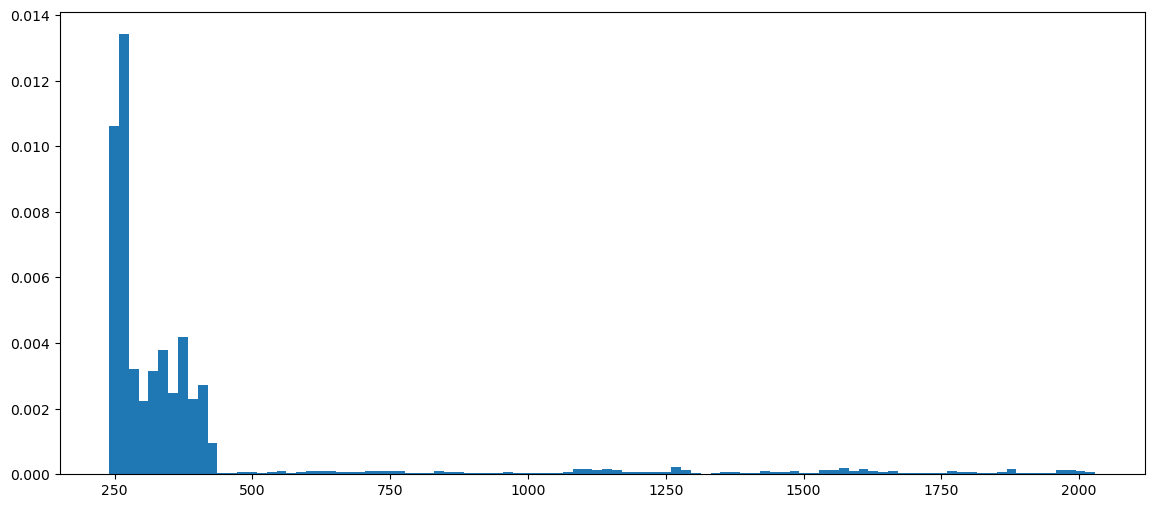

In [186]:
pixels = pixels.reshape(-1,4)
pixels[:6,3]

plt.figure(figsize=(14,6))
plt.hist(pixels[:,0],bins=100, density=True)
plt.show()

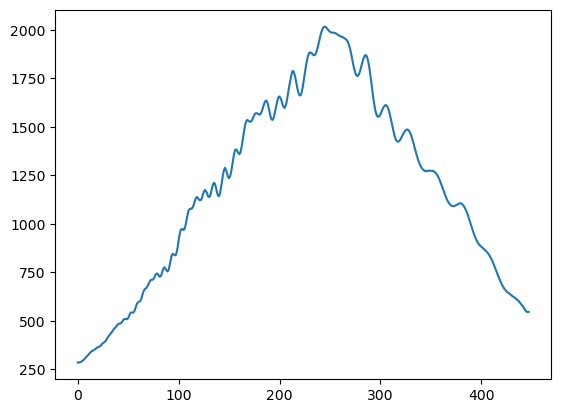

In [170]:
plt.plot(white_means)
plt.show()

In [171]:
pixel_dis = []
for i in range(448):
    layer = white_cube[:,:,i]
    
    mean_val = np.mean(layer)
    median_val = np.median(layer)
    std_val = np.std(layer)
    cv_val = std_val/mean_val

    pixel_dis.append([mean_val, median_val, std_val, cv_val])

In [172]:
pixel_dis = np.array(pixel_dis)

In [184]:
pixel_dis.shape
pixel_dis

array([[2.8459421e+02, 2.8400000e+02, 8.3987627e+00, 2.9511362e-02],
       [2.8459900e+02, 2.8400000e+02, 8.4038229e+00, 2.9528646e-02],
       [2.8563583e+02, 2.8500000e+02, 5.4890709e+00, 1.9217025e-02],
       ...,
       [5.4555286e+02, 5.4500000e+02, 1.0269653e+01, 1.8824305e-02],
       [5.4555292e+02, 5.4500000e+02, 1.0271683e+01, 1.8828023e-02],
       [5.4555554e+02, 5.4500000e+02, 1.0281973e+01, 1.8846793e-02]],
      dtype=float32)

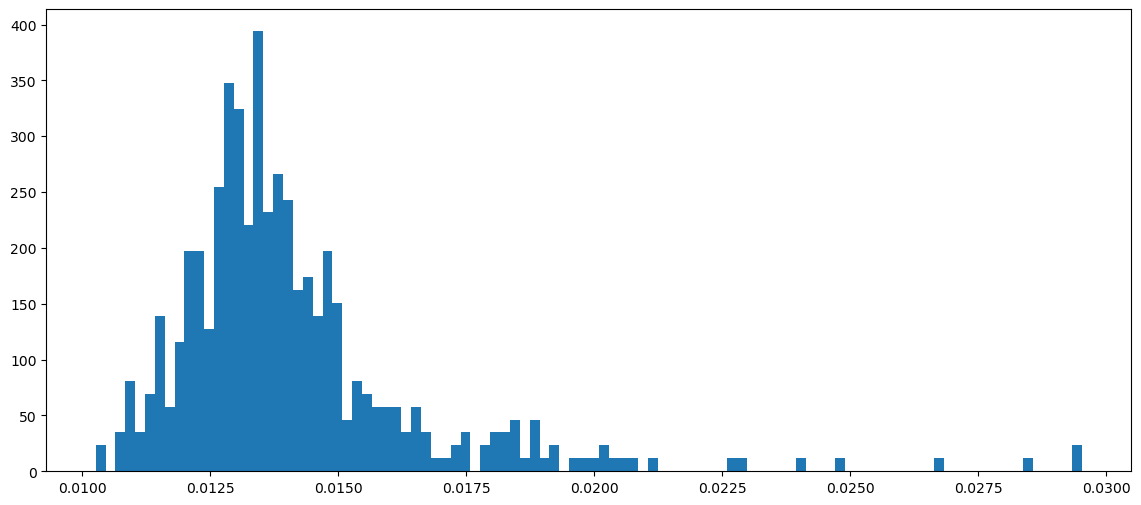

In [174]:
plt.figure(figsize=(14,6))
plt.hist(pixel_dis[:,3],bins=100, density=True)
plt.show()

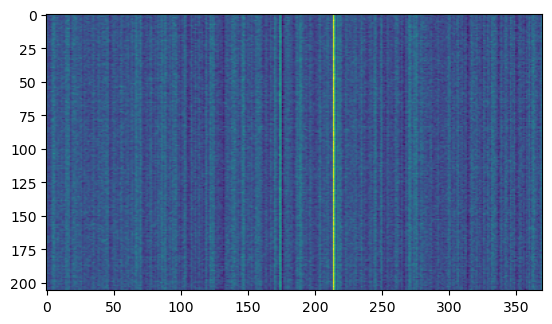

In [47]:
plt.imshow(white_cube[:,:,0])
plt.show()

In [49]:
layer_50 = white_cube[:,:, 50].reshape(-1)
layer_50.shape

(76220,)

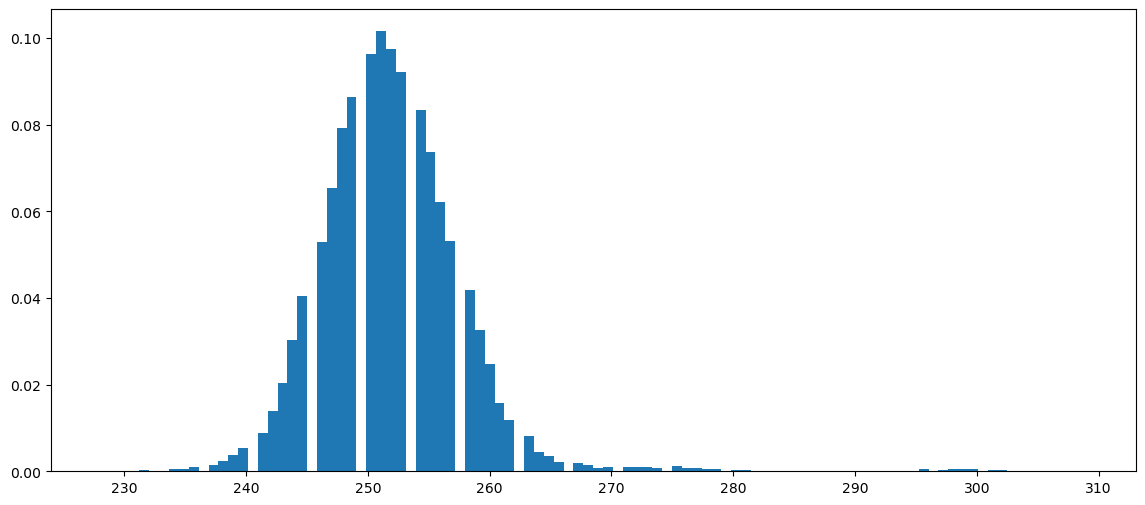

In [50]:
plt.figure(figsize=(14,6))
plt.hist(layer_50,bins=100, density=True)
plt.show()

In [57]:
mean_val = np.mean(layer_50)
std_val = np.std(layer_50)
median_val = np.median(layer_50)
cv_val = std_val/mean_val

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"CV: {cv_val:.2f}")

Mean: 251.92
Median: 252.00
Standard Deviation: 5.92
CV: 0.02


In [97]:
dark_list = []
for i in range(30):
    dark_file = glob.glob(valid_paths[i] + "DARKREF*.bip")
    dark_list.append(dark_file)

dark_list[12][0]

'D:/Leaf_Project/09_09_2025/G1_006_2025-09-10_18-05-20/calibrations\\DARKREF_G1_006_2025-09-10_18-05-20-FromSelection.bip'

In [113]:
dark_cubes = []
for i in range(30):
    dark_bip = dark_list[i][0]
    dark_hdr = dark_bip + ".hdr"
    dark_cube = load_one_img(dark_hdr, dark_bip)
    dark_cubes.append(dark_cube)

dark_cubes[0]

array([[[244., 244., 242., ..., 265., 265., 265.],
        [239., 240., 241., ..., 249., 249., 249.],
        [243., 244., 245., ..., 273., 273., 273.],
        ...,
        [250., 250., 251., ..., 248., 248., 248.],
        [251., 251., 255., ..., 241., 241., 241.],
        [243., 243., 245., ..., 241., 241., 241.]],

       [[247., 246., 251., ..., 264., 264., 264.],
        [243., 244., 250., ..., 262., 262., 262.],
        [243., 243., 249., ..., 281., 281., 281.],
        ...,
        [251., 251., 246., ..., 241., 241., 241.],
        [247., 248., 245., ..., 245., 245., 245.],
        [246., 246., 245., ..., 240., 240., 240.]],

       [[243., 242., 246., ..., 263., 263., 263.],
        [239., 240., 243., ..., 260., 260., 260.],
        [243., 243., 243., ..., 280., 280., 280.],
        ...,
        [245., 245., 244., ..., 242., 242., 242.],
        [251., 251., 250., ..., 240., 240., 240.],
        [246., 246., 244., ..., 238., 238., 238.]],

       ...,

       [[250., 249., 249

In [188]:
pixels = []
for i in range(30):
    dark_pixel_dis = []
    for j in range(dark_cubes[i].shape[2]):
        layer = dark_cubes[i][:,:,j]
        mean_val = np.mean(layer)
        median_val = np.median(layer)
        std_val = np.std(layer)
        cv_val = std_val/mean_val
        dark_pixel_dis.append([mean_val, median_val, std_val, cv_val])
    pixels.append(dark_pixel_dis)

pixels = np.array(pixels)

In [148]:
pixels.shape

(30, 448, 4)

In [154]:
pixels = pixels.reshape(-1,4)
pixels[:6,3]

array([0.02875293, 0.02871222, 0.02192756, 0.02118771, 0.02036434,
       0.01945875], dtype=float32)

In [141]:
dark_pix_dis = np.array(pixels[0])
dark_pix_dis

array([[2.4733966e+02, 2.4700000e+02, 7.1117411e+00, 2.8752934e-02],
       [2.4731009e+02, 2.4700000e+02, 7.1008215e+00, 2.8712219e-02],
       [2.4771927e+02, 2.4700000e+02, 5.4318790e+00, 2.1927560e-02],
       ...,
       [2.4840726e+02, 2.4800000e+02, 8.1063080e+00, 3.2633137e-02],
       [2.4841483e+02, 2.4800000e+02, 8.1250601e+00, 3.2707628e-02],
       [2.4841034e+02, 2.4800000e+02, 8.1322908e+00, 3.2737330e-02]],
      dtype=float32)

In [143]:
dark_pix_dis.shape

(448, 4)

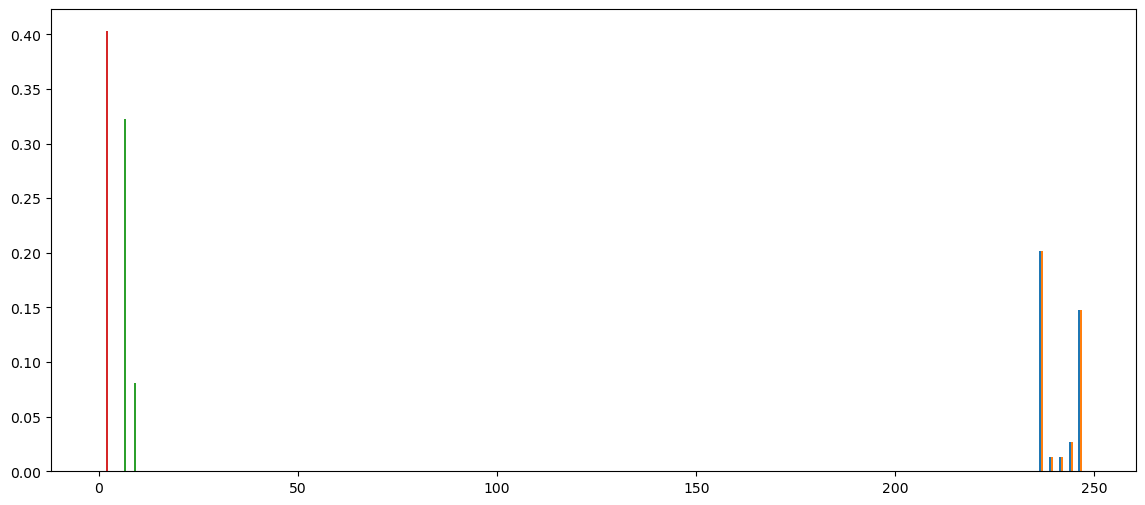

In [189]:
plt.figure(figsize=(14,6))
plt.hist(pixels[:,0],bins=100, density=True)
plt.show()